<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_1_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.6_n250.csv',
 'data_multi_delta_-1.6_n120.csv',
 'data_multi_delta_-1.6_n60.csv',
 'data_multi_delta_-1.6_n30.csv',
 'data_multi_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.364222,71.657684,29.183946,37.819909,-0.009244,244.016517,244.036476,-0.019959
1,0.0,1.0,85.217641,29.327948,60.995848,41.521713,0.182561,227.245711,227.081258,0.164453
2,0.0,2.0,68.671178,67.751121,26.187459,39.119372,-0.002614,211.726517,211.728901,-0.002384
3,0.0,3.0,76.351186,51.037281,27.878077,76.482251,0.039839,241.788634,241.755335,0.033300
4,0.0,4.0,42.652717,92.023294,54.855536,96.714069,-0.028799,296.216817,296.224389,-0.007572
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,69.774269,95.373934,32.944803,44.627776,0.026610,252.747392,252.745806,0.001586
29996,999.0,26.0,79.945540,67.905530,91.436026,65.765858,-0.012286,315.040669,315.057073,-0.016405
29997,999.0,27.0,90.455365,96.883368,92.650584,62.062972,0.025357,352.077647,352.070170,0.007477
29998,999.0,28.0,48.707280,40.140675,73.150902,56.034250,0.085424,228.118530,228.028024,0.090506


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.364222,71.657684,29.183946,37.819909,-0.009244,244.016517,244.036476,-0.019959
1,0.0,1.0,85.217641,29.327948,60.995848,41.521713,0.182561,227.245711,227.081258,0.164453
2,0.0,2.0,68.671178,67.751121,26.187459,39.119372,-0.002614,211.726517,211.728901,-0.002384
3,0.0,3.0,76.351186,51.037281,27.878077,76.482251,0.039839,241.788634,241.755335,0.033300
4,0.0,4.0,42.652717,92.023294,54.855536,96.714069,-0.028799,296.216817,296.224389,-0.007572
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,69.774269,95.373934,32.944803,44.627776,0.026610,252.747392,252.745806,0.001586
29996,999.0,26.0,79.945540,67.905530,91.436026,65.765858,-0.012286,315.040669,315.057073,-0.016405
29997,999.0,27.0,90.455365,96.883368,92.650584,62.062972,0.025357,352.077647,352.070170,0.007477
29998,999.0,28.0,48.707280,40.140675,73.150902,56.034250,0.085424,228.118530,228.028024,0.090506


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.364222  71.657684  29.183946  37.819909 -0.009244  244.016517   
      1.0    85.217641  29.327948  60.995848  41.521713  0.182561  227.245711   
      2.0    68.671178  67.751121  26.187459  39.119372 -0.002614  211.726517   
      3.0    76.351186  51.037281  27.878077  76.482251  0.039839  241.788634   
      4.0    42.652717  92.023294  54.855536  96.714069 -0.028799  296.216817   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   69.774269  95.373934  32.944803  44.627776  0.026610  252.747392   
      26.0   79.945540  67.905530  91.436026  65.765858 -0.012286  315.040669   
      27.0   90.455365  96.883368  92.650584  62.062972  0.025357  352.077647   
      28.0   48.707280  40.140675  73.150902  56.034250  0.085424  228.118530   
      29.0   30.450343  99.292775  59.707790  71.546625 -0.000730  270.996802   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    244.036476 -0.019959  
      1.0    227.081258  0.164453  
      2.0    211.728901 -0.002384  
      3.0    241.755335  0.033300  
      4.0    296.224389 -0.007572  
...                 ...       ...  
999.0 25.0   252.745806  0.001586  
      26.0   315.057073 -0.016405  
      27.0   352.070170  0.007477  
      28.0   228.028024  0.090506  
      29.0   271.007196 -0.010394  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.364222  71.657684  29.183946  37.819909 -0.009244  244.016517   
      1.0    85.217641  29.327948  60.995848  41.521713  0.182561  227.245711   
      2.0    68.671178  67.751121  26.187459  39.119372 -0.002614  211.726517   
      3.0    76.351186  51.037281  27.878077  76.482251  0.039839  241.788634   
      4.0    42.652717  92.023294  54.855536  96.714069 -0.028799  296.216817   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   69.774269  95.373934  32.944803  44.627776  0.026610  252.747392   
      26.0   79.945540  67.905530  91.436026  65.765858 -0.012286  315.040669   
      27.0   90.455365  96.883368  92.650584  62.062972  0.025357  352.077647   
      28.0   48.707280  40.140675  73.150902  56.034250  0.085424  228.118530   
      29.0   30.450343  99.292775  59.707790  71.546625 -0.000730  270.996802   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    244.036476 -0.019959  
      1.0    227.081258  0.164453  
      2.0    211.728901 -0.002384  
      3.0    241.755335  0.033300  
      4.0    296.224389 -0.007572  
...                 ...       ...  
999.0 25.0   252.745806  0.001586  
      26.0   315.057073 -0.016405  
      27.0   352.070170  0.007477  
      28.0   228.028024  0.090506  
      29.0   271.007196 -0.010394  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.364222,71.657684,29.183946,37.819909,-0.009244,244.016517,244.036476,-0.019959
1,0.0,1.0,85.217641,29.327948,60.995848,41.521713,0.182561,227.245711,227.081258,0.164453
2,0.0,2.0,68.671178,67.751121,26.187459,39.119372,-0.002614,211.726517,211.728901,-0.002384
3,0.0,3.0,76.351186,51.037281,27.878077,76.482251,0.039839,241.788634,241.755335,0.033300
4,0.0,4.0,42.652717,92.023294,54.855536,96.714069,-0.028799,296.216817,296.224389,-0.007572
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,69.774269,95.373934,32.944803,44.627776,0.026610,252.747392,252.745806,0.001586
29996,999.0,26.0,79.945540,67.905530,91.436026,65.765858,-0.012286,315.040669,315.057073,-0.016405
29997,999.0,27.0,90.455365,96.883368,92.650584,62.062972,0.025357,352.077647,352.070170,0.007477
29998,999.0,28.0,48.707280,40.140675,73.150902,56.034250,0.085424,228.118530,228.028024,0.090506


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.364222  71.657684  29.183946  37.819909 -0.009244  244.016517   
      1.0    85.217641  29.327948  60.995848  41.521713  0.182561  227.245711   
      2.0    68.671178  67.751121  26.187459  39.119372 -0.002614  211.726517   
      3.0    76.351186  51.037281  27.878077  76.482251  0.039839  241.788634   
      4.0    42.652717  92.023294  54.855536  96.714069 -0.028799  296.216817   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   69.774269  95.373934  32.944803  44.627776  0.026610  252.747392   
      26.0   79.945540  67.905530  91.436026  65.765858 -0.012286  315.040669   
      27.0   90.455365  96.883368  92.650584  62.062972  0.025357  352.077647   
      28.0   48.707280  40.140675  73.150902  56.034250  0.085424  228.118530   
      29.0   30.450343  99.292775  59.707790  71.546625 -0.000730  270.996802   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    244.036476 -0.019959  
      1.0    227.081258  0.164453  
      2.0    211.728901 -0.002384  
      3.0    241.755335  0.033300  
      4.0    296.224389 -0.007572  
...                 ...       ...  
999.0 25.0   252.745806  0.001586  
      26.0   315.057073 -0.016405  
      27.0   352.070170  0.007477  
      28.0   228.028024  0.090506  
      29.0   271.007196 -0.010394  

[30000 rows x 8 columns]

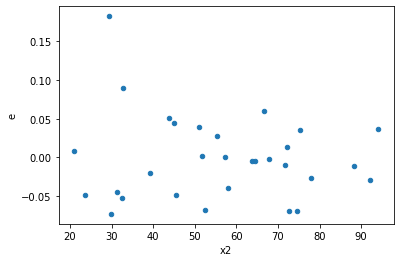

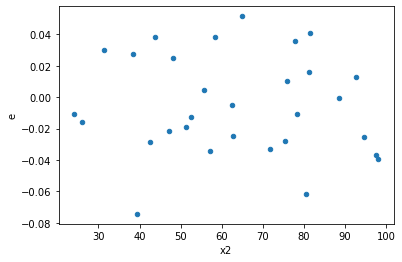

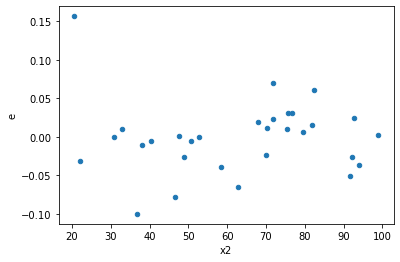

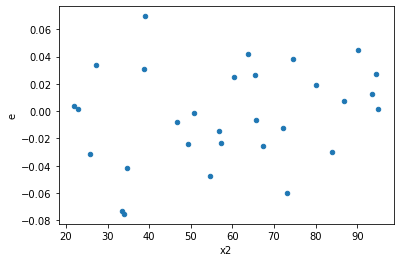

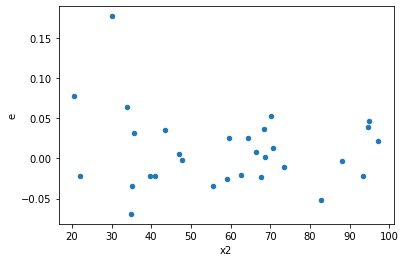

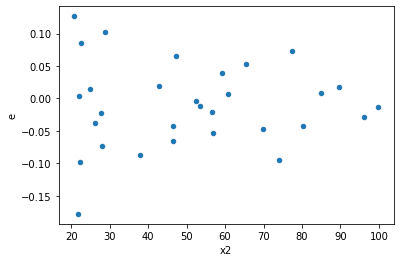

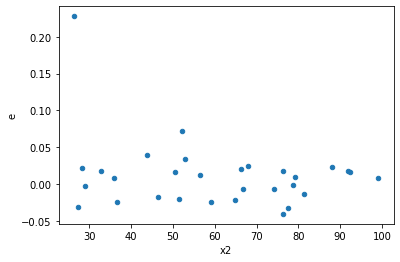

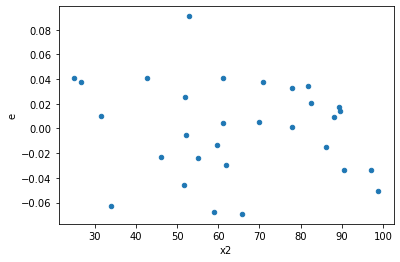

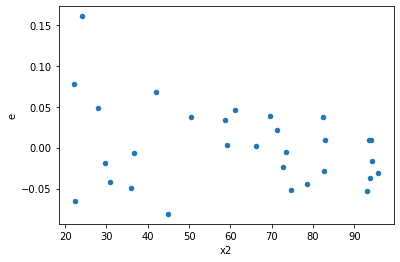

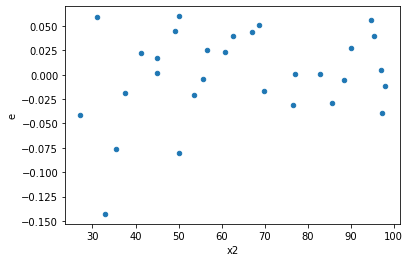

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
6.0,8.0,8.0,0.005387573358603581,0.018177251469837848,0.0006734466698254477,0.002272156433729731,3.373921849399978,0.10500038526264555,0.9474998073686772,0.05250019263132277,Reject001=1 : Homoscedasticity
7.0,8.0,8.0,0.006771131424747635,0.009946356358405526,0.0008463914280934544,0.0012432945448006907,1.4689356526226685,0.5991855123998966,0.7004072438000517,0.2995927561999483,Reject001=1 : Homoscedasticity
11.0,8.0,8.0,0.014158027247642022,0.022291638390576393,0.0017697534059552527,0.002786454798822049,1.574487603439879,0.5354559354563344,0.7322720322718328,0.2677279677281672,Reject001=1 : Homoscedasticity
16.0,8.0,8.0,0.0032628578042415385,0.023508553871337202,0.0004078572255301923,0.0029385692339171502,7.204896836379861,0.011370544304205144,0.9943147278478974,0.005685272152102572,Reject001=1 : Homoscedasticity
18.0,8.0,8.0,0.01838356020535934,0.029277633739011252,0.0022979450256699176,0.0036597042173764065,1.5925986812106163,0.5253104024029192,0.7373447987985404,0.2626552012014596,Reject001=1 : Homoscedasticity
25.0,8.0,8.0,0.015214409415082352,0.015792374831672753,0.001901801176885294,0.001974046853959094,1.0379880283764056,0.959239237723507,0.5203803811382465,0.4796196188617535,Reject001=1 : Homoscedasticity
38.0,8.0,8.0,0.00571109112251649,0.013954738694189013,0.0007138863903145612,0.0017443423367736266,2.443445288269207,0.227880278948698,0.886059860525651,0.113940139474349,Reject001=1 : Homoscedasticity
44.0,8.0,8.0,0.008715526682207472,0.014320431756824096,0.001089440835275934,0.001790053969603012,1.6430942476556116,0.49816242930709453,0.7509187853464527,0.24908121465354727,Reject001=1 : Homoscedasticity
46.0,8.0,8.0,0.01122547701609581,0.011809306028765697,0.0014031846270119762,0.001476163253595712,1.0520092831540928,0.9445922343705315,0.5277038828147342,0.47229611718526576,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,0.022848230408309335,0.015255647632573435,0.002856028801038667,0.0019069559540716794,0.6676949312899669,0.5810166228447016,Reject001=1 : Homoscedasticity
1.0,8.0,8.0,0.01120098772231372,0.007452526422707151,0.001400123465289215,0.0009315658028383938,0.6653454684055066,0.5777426013001364,Reject001=1 : Homoscedasticity
2.0,8.0,8.0,0.016594740532184224,0.009820247307624963,0.002074342566523028,0.0012275309134531203,0.5917686563751537,0.47445166424631074,Reject001=1 : Homoscedasticity
3.0,8.0,8.0,0.013720393035448041,0.0071209637189571075,0.0017150491294310052,0.0008901204648696384,0.5190058113174577,0.3727008385587621,Reject001=1 : Homoscedasticity
4.0,8.0,8.0,0.02388459041910566,0.0033320603044712086,0.0029855738023882076,0.0004165075380589011,0.13950669640982585,0.011560026767141787,Reject001=1 : Homoscedasticity
5.0,8.0,8.0,0.043778186059548564,0.01827383718164133,0.0054722732574435705,0.0022842296477051664,0.4174187837930206,0.23801506301988173,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,0.005387573358603581,0.018177251469837848,0.0006734466698254477,0.002272156433729731,3.373921849399978,0.10500038526264555,Reject001=1 : Homoscedasticity
7.0,8.0,8.0,0.006771131424747635,0.009946356358405526,0.0008463914280934544,0.0012432945448006907,1.4689356526226685,0.5991855123998966,Reject001=1 : Homoscedasticity
8.0,8.0,8.0,0.013867060667100558,0.0036759875942797057,0.0017333825833875697,0.0004594984492849632,0.26508772713462947,0.07822518935327094,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      930
Reject001=0 : Heteroscedasticity     70
Name: Result_test, dtype: int64